In [ ]:
# !pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import os

DATA_FOLDER = "data"

In [2]:
filename = os.path.join(DATA_FOLDER, "auto_price.csv")
df=pd.read_csv(filename) 
df.drop_duplicates(inplace = True)
df = df[df["price"]< 600000].copy()

In [3]:
df = df.sample(10000)

In [4]:
df.columns

Index(['price', 'MatriculationMonth', 'MatriculationYear', 'km', 'cv',
       'FuelType', 'gearboxType', 'Consume', 'city', 'province', 'Brand',
       'Model', 'Preparation', 'Engine', 'Seats', 'ConsumeFuel',
       'ConsumeFuelNotUrban', 'Emissions', 'Color', 'Metallizzato', 'Airbag',
       'NumberDoors', 'EmissionClass', 'AirConditioning', 'Interior'],
      dtype='object')

In [5]:
df.head()

,price,MatriculationMonth,MatriculationYear,km,cv,FuelType,gearboxType,Consume,city,province,...,ConsumeFuel,ConsumeFuelNotUrban,Emissions,Color,Metallizzato,Airbag,NumberDoors,EmissionClass,AirConditioning,Interior
48504,26800,Luglio,2009,77496.0,210.0,Diesel,Cambio automatico,7.2,Torino,Torino,...,7.2,5.8,190.0,Grigio,Sì,Airbag anteriori e laterali e di altro tipo,2 o 3 porte,Euro 4,Climatizzatore automatico,Nero
9518,9600,Aprile,2017,29560.0,54.0,Benzina,Cambio manuale,NaN,Roma,Roma,...,NaN,NaN,NaN,Grigio,NaN,NaN,4 o 5 porte,NaN,Senza climatizzatore,NaN
128237,14500,Febbraio,2016,22700.0,NaN,Diesel,Cambio manuale,NaN,Matera,Matera,...,NaN,NaN,NaN,Argento,NaN,Airbag conducente,NaN,NaN,Senza climatizzatore,NaN
34451,13500,Marzo,2017,17300.0,70.0,Diesel,Cambio manuale,3.4,Bastia Umbra,Perugia,...,3.4,3.0,89.0,Nero,NaN,Airbag anteriori e laterali,2 o 3 porte,Euro 6,Climatizzatore automatico,Grigio
138208,32900,No Mese,2018,NaN,133.0,Diesel,Cambio manuale,6.9,Denno,Trento,...,6.9,6.1,180.0,Nero,Sì,Airbag anteriori e laterali e di altro tipo,4 o 5 porte,Euro 6,Climatizzatore automatico,Nero


In [6]:
df.shape

(10000, 25)

In [7]:
col_to_keep = ["MatriculationYear", "km", "cv", "FuelType", "gearboxType", "Engine", "Brand", "price"]
df = df[col_to_keep].copy()

In [8]:
df.head()

,MatriculationYear,km,cv,FuelType,gearboxType,Engine,Brand,price
48504,2009,77496.0,210.0,Diesel,Cambio automatico,2993.0,BMW,26800
9518,2017,29560.0,54.0,Benzina,Cambio manuale,1149.0,RENAULT,9600
128237,2016,22700.0,NaN,Diesel,Cambio manuale,1499.0,FORD,14500
34451,2017,17300.0,70.0,Diesel,Cambio manuale,1248.0,FIAT,13500
138208,2018,NaN,133.0,Diesel,Cambio manuale,2442.0,MITSUBISHI,32900


In [9]:
from datetime import datetime
currentYear = datetime.now().year
df["year"]=df["MatriculationYear"].apply(lambda x: currentYear-int(x))

In [10]:
df.drop(["MatriculationYear"], axis=1, inplace=True)

In [11]:
df.head()

,km,cv,FuelType,gearboxType,Engine,Brand,price,year
48504,77496.0,210.0,Diesel,Cambio automatico,2993.0,BMW,26800,15
9518,29560.0,54.0,Benzina,Cambio manuale,1149.0,RENAULT,9600,7
128237,22700.0,NaN,Diesel,Cambio manuale,1499.0,FORD,14500,8
34451,17300.0,70.0,Diesel,Cambio manuale,1248.0,FIAT,13500,7
138208,NaN,133.0,Diesel,Cambio manuale,2442.0,MITSUBISHI,32900,6


In [12]:
df.isna().sum()

km             1645
cv              640
FuelType         40
gearboxType      54
Engine          458
Brand             9
price             0
year              0
dtype: int64

In [13]:
df.dropna(inplace = True)

In [14]:
conteggio=df["Brand"].value_counts().reset_index()
lista=conteggio[conteggio["Brand"]>500]["index"].values

In [15]:
lista

array(['FIAT', 'BMW', 'MERCEDES BENZ', 'AUDI', 'VOLKSWAGEN'], dtype=object)

In [16]:
df["Brand"]=df["Brand"].apply(lambda x:  x if x in lista else "Other")

In [17]:
df.head()

,km,cv,FuelType,gearboxType,Engine,Brand,price,year
48504,77496.0,210.0,Diesel,Cambio automatico,2993.0,BMW,26800,15
9518,29560.0,54.0,Benzina,Cambio manuale,1149.0,Other,9600,7
34451,17300.0,70.0,Diesel,Cambio manuale,1248.0,FIAT,13500,7
26133,1.0,70.0,Diesel,Cambio manuale,1248.0,Other,13900,7
100193,24900.0,88.0,Diesel,Cambio automatico,1598.0,Other,24500,7


In [18]:
cat_features = ["FuelType", "gearboxType", "Brand"]
num_features = ["km", "cv", "Engine", "year"]

y_vars = ["price"]

In [19]:
#cat_features + num_features

In [20]:
dummy_df = pd.get_dummies(df[cat_features])
df_with_dummies = pd.concat([df[num_features],dummy_df], axis = 1)
cat_features = list(dummy_df.columns)

x_vars = cat_features + num_features

In [21]:
x = df_with_dummies.copy()
y = df[y_vars].copy()

In [22]:
#y

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape )

(5966, 21) (5966, 1) (1492, 21) (1492, 1)


In [24]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
sd.fit(x_train[num_features])

x_train[num_features] = sd.transform(x_train[num_features])
x_test[num_features] = sd.transform(x_test[num_features])

In [25]:
#train_x

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import initializers

In [27]:
def build_NN(num_layer, neurons_per_layer):
    inputs = keras.Input(shape=(x_train.shape[1],))
    support = inputs
    for i in range(num_layer):
        a_1 = layers.Dense(neurons_per_layer[i], activation="relu", 
                           kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros())(support)
        support = a_1
    outputs = layers.Dense(1, activation="relu", 
                           kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros())(support)
    model = keras.Model(inputs=inputs, outputs=outputs, name="car_model")
    model.summary()
    
    model.compile(
        loss=keras.losses.mean_squared_error,
        optimizer=keras.optimizers.Adam(),
        metrics=["mse"]
    )
    return model
    
        

In [28]:
params_dict = [
    {"num_layer" : 3 , "neurons_per_layer" : [[12,12,12], [12,24,12]]},
    {"num_layer" : 4 , "neurons_per_layer" : [[8,8,8,8], [12,24,24,12]]}
]

In [29]:
import itertools

def param_iterator():
    for dd in params_dict:
        for num_lay, neuron_list in itertools.product([dd["num_layer"]], dd["neurons_per_layer"]):
            yield num_lay, neuron_list

Fold 0 3 [12, 12, 12]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense (Dense)               (None, 12)                264       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 589
Trainable params: 589
Non-trainable params: 0
_________________________________________________________________
[600983808.0, 600850112.0, 599966016.

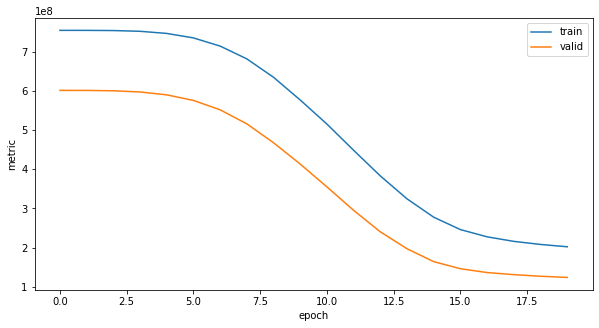

Fold 1 3 [12, 12, 12]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_4 (Dense)             (None, 12)                264       
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 589
Trainable params: 589
Non-trainable params: 0
_________________________________________________________________
[718609600.0, 718321984.0, 716367296.

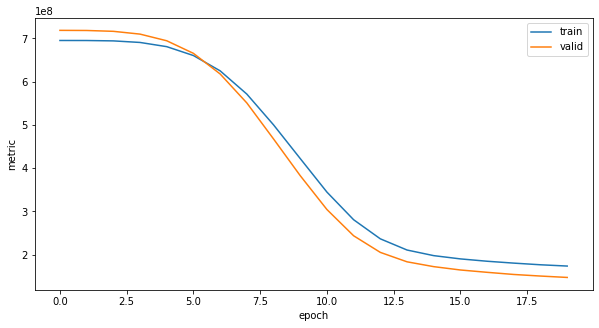

Fold 2 3 [12, 12, 12]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_8 (Dense)             (None, 12)                264       
                                                                 
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 dense_10 (Dense)            (None, 12)                156       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 589
Trainable params: 589
Non-trainable params: 0
_________________________________________________________________
[789440128.0, 789247680.0, 787913664.

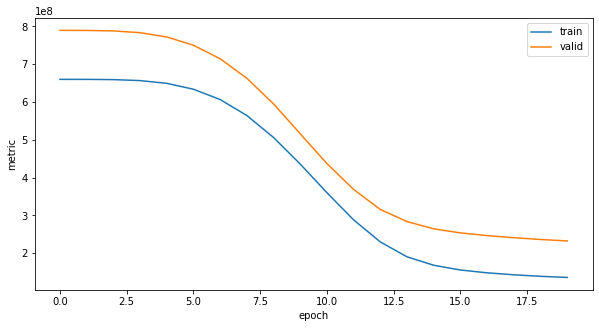

Fold 0 3 [12, 24, 12]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_12 (Dense)            (None, 12)                264       
                                                                 
 dense_13 (Dense)            (None, 24)                312       
                                                                 
 dense_14 (Dense)            (None, 12)                300       
                                                                 
 dense_15 (Dense)            (None, 1)                 13        
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________
[600974912.0, 600536320.0, 597529536.

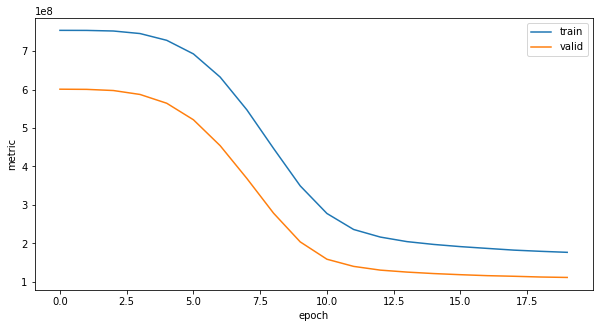

Fold 1 3 [12, 24, 12]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_16 (Dense)            (None, 12)                264       
                                                                 
 dense_17 (Dense)            (None, 24)                312       
                                                                 
 dense_18 (Dense)            (None, 12)                300       
                                                                 
 dense_19 (Dense)            (None, 1)                 13        
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________
[718613440.0, 718414592.0, 717064832.

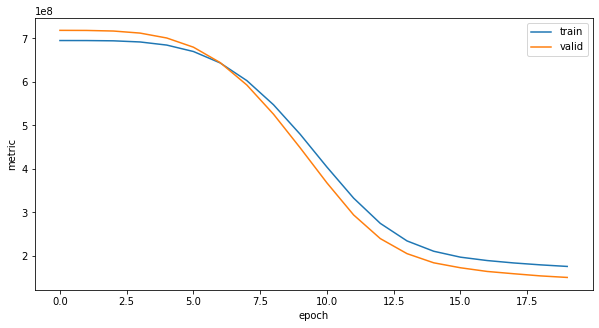

Fold 2 3 [12, 24, 12]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_20 (Dense)            (None, 12)                264       
                                                                 
 dense_21 (Dense)            (None, 24)                312       
                                                                 
 dense_22 (Dense)            (None, 12)                300       
                                                                 
 dense_23 (Dense)            (None, 1)                 13        
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________
[789424832.0, 788704256.0, 783645888.

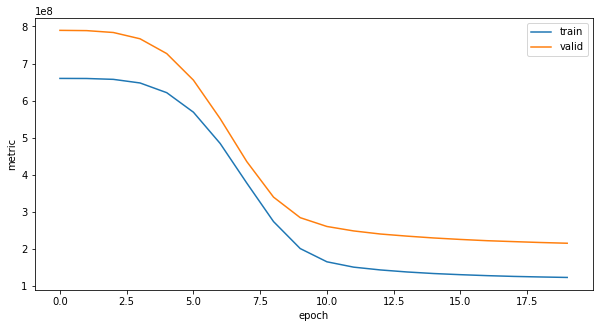

Fold 0 4 [8, 8, 8, 8]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_24 (Dense)            (None, 8)                 176       
                                                                 
 dense_25 (Dense)            (None, 8)                 72        
                                                                 
 dense_26 (Dense)            (None, 8)                 72        
                                                                 
 dense_27 (Dense)            (None, 8)                 72        
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401
Trainable params:

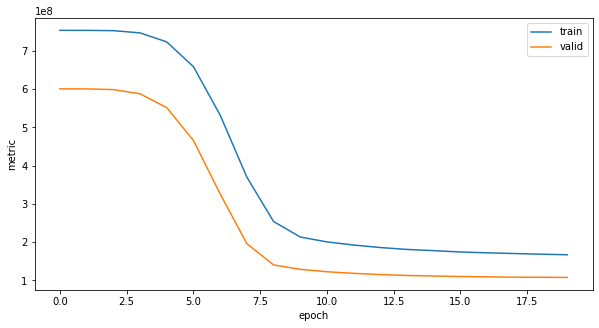

Fold 1 4 [8, 8, 8, 8]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_29 (Dense)            (None, 8)                 176       
                                                                 
 dense_30 (Dense)            (None, 8)                 72        
                                                                 
 dense_31 (Dense)            (None, 8)                 72        
                                                                 
 dense_32 (Dense)            (None, 8)                 72        
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401
Trainable params:

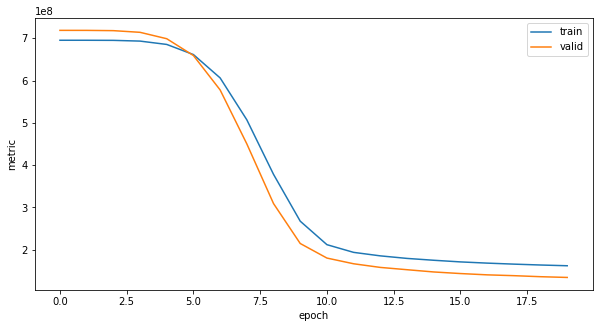

Fold 2 4 [8, 8, 8, 8]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_34 (Dense)            (None, 8)                 176       
                                                                 
 dense_35 (Dense)            (None, 8)                 72        
                                                                 
 dense_36 (Dense)            (None, 8)                 72        
                                                                 
 dense_37 (Dense)            (None, 8)                 72        
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401
Trainable params:

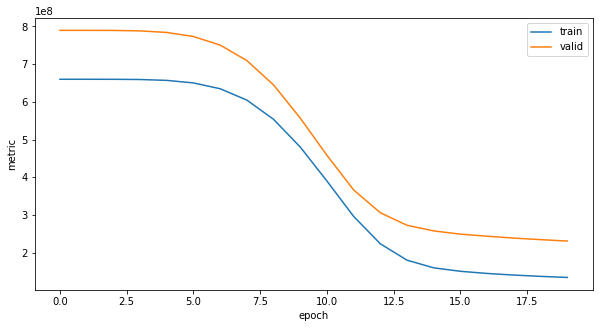

Fold 0 4 [12, 24, 24, 12]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 21)]              0         
                                                                 
 dense_39 (Dense)            (None, 12)                264       
                                                                 
 dense_40 (Dense)            (None, 24)                312       
                                                                 
 dense_41 (Dense)            (None, 24)                600       
                                                                 
 dense_42 (Dense)            (None, 12)                300       
                                                                 
 dense_43 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1,489
Trainable p

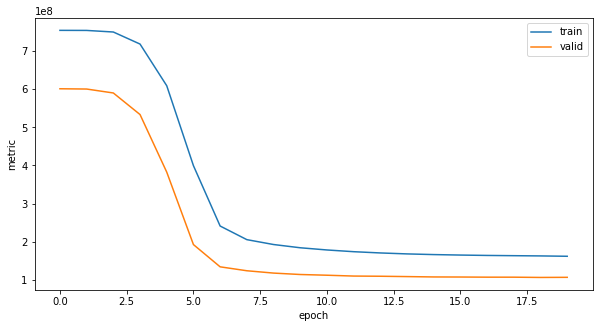

Fold 1 4 [12, 24, 24, 12]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 21)]              0         
                                                                 
 dense_44 (Dense)            (None, 12)                264       
                                                                 
 dense_45 (Dense)            (None, 24)                312       
                                                                 
 dense_46 (Dense)            (None, 24)                600       
                                                                 
 dense_47 (Dense)            (None, 12)                300       
                                                                 
 dense_48 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1,489
Trainable p

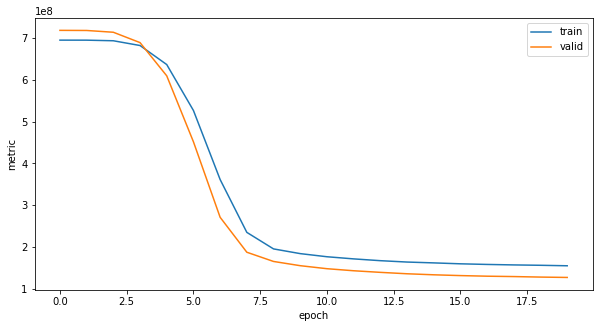

Fold 2 4 [12, 24, 24, 12]
Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 21)]              0         
                                                                 
 dense_49 (Dense)            (None, 12)                264       
                                                                 
 dense_50 (Dense)            (None, 24)                312       
                                                                 
 dense_51 (Dense)            (None, 24)                600       
                                                                 
 dense_52 (Dense)            (None, 12)                300       
                                                                 
 dense_53 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1,489
Trainable p

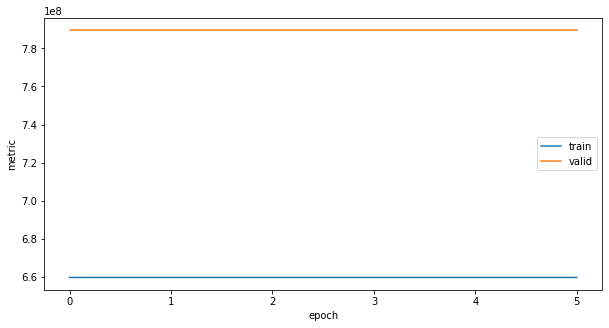

In [30]:
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt


kf = KFold(n_splits=3, random_state=None, shuffle=False)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1) 

results = {
    "layer" : [],
    "arch" : [],
    "val_loss" : []
}

for layer_num, neurons in param_iterator():
    ll = []
    for i, (train_index, val_index) in enumerate(kf.split(x_train)):
        print(f"Fold {i} {layer_num} {neurons}")
        model = build_NN(layer_num, neurons)
        x_train_data = x_train.values[train_index]
        y_train_data = y_train.values[train_index]
        
        x_val_data = x_train.values[val_index]
        y_val_data = y_train.values[val_index]
        
        # this is strange because if early stopping use validation data !!
        # we should not use early stopping and cross-validate epochs !!
        history = model.fit(x_train_data, y_train_data, 
                            batch_size=64, epochs=20, 
                            validation_data = (x_val_data, y_val_data) , 
                            callbacks=[callback], verbose=0)
        
        val_loss = model.history.history['val_loss']
        print(val_loss)
        ll.append(val_loss[-1])
        
        fig , ax = plt.subplots(1,1, figsize = (10,5))
        ax.plot(history.history['mse'], label = "train")
        ax.plot(history.history['val_mse'], label ="valid")
        ax.set_xlabel("epoch")
        ax.set_ylabel("metric")
        ax.legend()
        plt.show()
    
    results["layer"].append(layer_num)
    results["arch"].append(neurons)
    results["val_loss"].append(ll)
        
        
        
    

In [31]:
res = pd.DataFrame(results)

In [32]:
res

,layer,arch,val_loss
0,3,"[12, 12, 12]","[124109712.0, 147194528.0, 232258512.0]"
1,3,"[12, 24, 12]","[111346112.0, 150251168.0, 215255936.0]"
2,4,"[8, 8, 8, 8]","[107495800.0, 134240448.0, 231022800.0]"
3,4,"[12, 24, 24, 12]","[106948016.0, 127108432.0, 789449856.0]"


In [33]:
res["avg_val_loss"] = res["val_loss"].apply(lambda x: np.array(x).mean())

In [34]:
res.sort_values("avg_val_loss")

,layer,arch,val_loss,avg_val_loss
2,4,"[8, 8, 8, 8]","[107495800.0, 134240448.0, 231022800.0]",1.575863e+08
1,3,"[12, 24, 12]","[111346112.0, 150251168.0, 215255936.0]",1.589511e+08
0,3,"[12, 12, 12]","[124109712.0, 147194528.0, 232258512.0]",1.678543e+08
3,4,"[12, 24, 24, 12]","[106948016.0, 127108432.0, 789449856.0]",3.411688e+08


In [38]:
model = build_NN(4, [8, 8, 8, 8])
history = model.fit(x_train, y_train, batch_size=64, epochs=20)

Model: "car_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 21)]              0         
                                                                 
 dense_64 (Dense)            (None, 8)                 176       
                                                                 
 dense_65 (Dense)            (None, 8)                 72        
                                                                 
 dense_66 (Dense)            (None, 8)                 72        
                                                                 
 dense_67 (Dense)            (None, 8)                 72        
                                                                 
 dense_68 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable par

In [41]:
#import matplotlib.pyplot as plt
#fig , ax = plt.subplots(1,1, figsize = (10,5))
#
#ax.plot(history.history['mse'], label = "train")
#ax.plot(history.history['val_mse'], label ="valid")
#ax.set_xlabel("epoch")
#ax.set_ylabel("metric")
#ax.legend()
#plt.show()

In [42]:
y_predict = model.predict(x_test)#, y_test, verbose=2)

47/47 [==============================] - 0s 965us/step


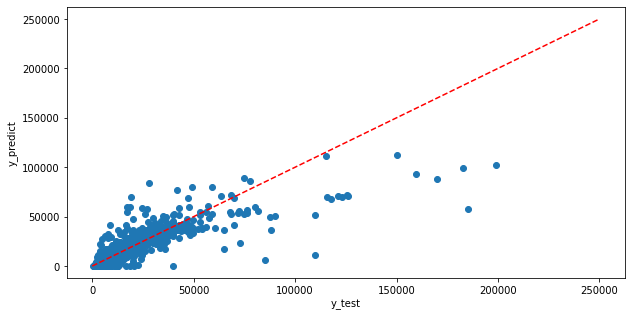

In [43]:
fig , ax = plt.subplots(1,1, figsize = (10,5))

ax.scatter(y_test.values, y_predict.reshape(-1))
ax.plot([0,250000], [0,250000], "--", c="red")
ax.set_xlabel("y_test")
ax.set_ylabel("y_predict")
plt.show()

In [44]:
#y_predict.reshape(-1)